# <center>Models Analysis</center>

## <center>Final Evaluation</center>


|                |                 Random Forest |            LightGBM |                      XGBoost |           CatBoost |                MLP Classifier | Ensemble soft voting |   Ensemble stacked |
|---------------:|------------------------------:|--------------------:|-----------------------------:|-------------------:|------------------------------:|---------------------:|-------------------:|
|       Accuracy |                        0.7395 |              0.7411 |                        0.395 |             0.7395 |                        0.7393 |               0.7421 |             0.7409 |
|        ROC AUC |                      0.642177 |            0.643960 |                     0.642581 |           0.633388 |                      0.634936 |             0.649130 |           0.649733 |
|    Tuning Time | 2 hours , 49 mins and 45 secs | 11 mins and 10 secs | 4 hours , 8 mins and 41 secs | 9 mins and 10 secs | 4 hours , 58 mins and 28 secs |                    - |                  - |
|  Training Time |                       39 secs |              14 secs |                      59 secs |             10 secs |             36 mins and 29 secs |  2 mins and 33 secs | 9 mins and 14 secs |
| Inference Time |                 0.048623 secs |       0.006243 secs |                0.007087 secs |      0.013457 secs |                 0.003036 secs |        0.331205 secs |      0.399165 secs |
|           Size |                       45.34MB |              0.44MB |                       0.19MB |             0.91MB |                        1.56MB |              47.11MB |            47.11MB |

## Model podium performance


|                      | AUC | Inference time |
|---------------------:|----:|---------------:|
|        Random Forest |     |                |
|             LightGBM |   🥉 |              🥈 |
|              XGBoost |     |              🥉 |
|             CatBoost |     |                |
|       MLP Classifier |     |              🥇 |
| Ensemble soft voting |   🥈 |                |
| Ensemble stacked     |   🥇 |                |

In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from src import utils
from src.models import predict_model
import os 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

### Load pre-processed data

In [2]:
X_train = utils.load_data_checkpoint('../data/processed/X_train.pickle')
X_test = utils.load_data_checkpoint('../data/processed/X_test.pickle')
y_train = utils.load_data_checkpoint('../data/processed/y_train.pickle')
y_test = utils.load_data_checkpoint('../data/processed/y_test.pickle')

Object loaded successfully from ../data/processed/X_train.pickle.
Object loaded successfully from ../data/processed/X_test.pickle.
Object loaded successfully from ../data/processed/y_train.pickle.
Object loaded successfully from ../data/processed/y_test.pickle.


In [3]:
print(f"X_train = {X_train.shape}, X_test = {X_test.shape}")
print(f"y_train = {y_train.shape}, y_test = {y_test.shape}")

X_train = (40000, 1773), X_test = (10000, 1773)
y_train = (40000,), y_test = (10000,)


### Load tuned models

In [4]:
clf1 = utils.load_data_checkpoint('../src/models/trained_models/tuned/rforest_hyp.pickle')
clf2 = utils.load_data_checkpoint('../src/models/trained_models/tuned/lgbm_hyp.pickle')
clf3 = utils.load_data_checkpoint('../src/models/trained_models/tuned/xgb_hyp.pickle')
clf4 = utils.load_data_checkpoint('../src/models/trained_models/tuned/cbc_hyp.pickle')
clf5 = utils.load_data_checkpoint('../src/models/trained_models/tuned/mlp_hyp.pickle') 

Object loaded successfully from ../src/models/trained_models/tuned/rforest_hyp.pickle.
Object loaded successfully from ../src/models/trained_models/tuned/lgbm_hyp.pickle.
Object loaded successfully from ../src/models/trained_models/tuned/xgb_hyp.pickle.
Object loaded successfully from ../src/models/trained_models/tuned/cbc_hyp.pickle.
Object loaded successfully from ../src/models/trained_models/tuned/mlp_hyp.pickle.


-----------------------------------------------
### 1.0 - Best models training time
-----------------------------------------------

In [5]:
#instance models
rforest = RandomForestClassifier(n_jobs=-1, random_state=42,**clf1.best_params_)
lgbmclf = lgb.LGBMClassifier(random_state=42,**clf2.best_params_)
xgbclf = xgb.XGBClassifier(random_state=42,**clf3.best_params_)
cbcclf = CatBoostClassifier(random_state=42,**clf4.best_params_)
mlpclf = MLPClassifier(random_state=42,**clf5.best_params_)

In [6]:
# training time measure and save each model with best hyperparamters

models = [rforest,lgbmclf,xgbclf,cbcclf,mlpclf]

for model in models:
    start_time = utils.timer(None)
    model.fit(X_train, y_train)
    utils.timer(start_time)
    utils.save_data_checkpoint(model,f'../src/models/trained_models/best/best_{str(model)[:3]}.pickle')

Time taken by function: 0 hours , 0 mins and 39.206537 secs
Object saved successfully in ../src/models/trained_models/best/best_Ran.pickle with 45.34MB.
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
Time taken by function: 0 hours , 0 mins and 14.306383 secs
Object saved successfully in ../src/models/trained_models/best/best_LGB.pickle with 0.44MB.
Time taken by function: 0 hours , 0 mins and 59.918506 secs
Object saved successfully in ../src/models/trained_models/best/best_XGB.pickle with 0.19MB.
0:	learn: 0.6818707	total: 122ms	remaining: 12.1s
1:	learn: 0.6719861	total: 154ms	remaining: 7.53s
2:	learn: 0.6632935	total: 229ms	remaining: 7.41s
3:	learn: 0.6554775	total: 306ms	remaining: 7.35s
4:	learn: 0.6472624	total: 385ms	remaining: 7.32s
5:	learn: 0.6397606	total: 459ms	remaining: 7.19s
6:	learn: 0.6331938	total: 531ms	remaining: 7.06s
7:	learn: 0.6268367	total: 606ms	remaining: 6.97s
8

/home/app/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------------------
### 2.0 - Building a Voting Classifier ensemble
-----------------------------------------------

In [7]:
# create a voting classifier with soft voting
voting_classifier_soft = VotingClassifier(
    estimators = [('rf',RandomForestClassifier(n_jobs=-1, random_state=42,**clf1.best_params_)),
                  ('lgbm',lgb.LGBMClassifier(random_state=42,**clf2.best_params_)),
                  ('xgb', xgb.XGBClassifier(random_state=42,**clf3.best_params_)),
                  ('cbc', CatBoostClassifier(random_state=42,**clf4.best_params_))],  
    voting='soft')

start_time = utils.timer(None)

# make predictions with the soft.best_params_ voting model
voting_classifier_soft.fit(X_train, y_train)

utils.timer(start_time)

0:	learn: 0.6818707	total: 125ms	remaining: 12.4s
1:	learn: 0.6719861	total: 169ms	remaining: 8.29s
2:	learn: 0.6632935	total: 274ms	remaining: 8.86s
3:	learn: 0.6554775	total: 421ms	remaining: 10.1s
4:	learn: 0.6472624	total: 509ms	remaining: 9.66s
5:	learn: 0.6397606	total: 607ms	remaining: 9.5s
6:	learn: 0.6331938	total: 709ms	remaining: 9.42s
7:	learn: 0.6268367	total: 802ms	remaining: 9.22s
8:	learn: 0.6216404	total: 895ms	remaining: 9.05s
9:	learn: 0.6163529	total: 1.02s	remaining: 9.2s
10:	learn: 0.6117219	total: 1.13s	remaining: 9.15s
11:	learn: 0.6071428	total: 1.23s	remaining: 9.05s
12:	learn: 0.6035073	total: 1.35s	remaining: 9.03s
13:	learn: 0.5996944	total: 1.44s	remaining: 8.87s
14:	learn: 0.5962998	total: 1.56s	remaining: 8.84s
15:	learn: 0.5931598	total: 1.67s	remaining: 8.77s
16:	learn: 0.5902120	total: 1.8s	remaining: 8.81s
17:	learn: 0.5873566	total: 1.96s	remaining: 8.91s
18:	learn: 0.5850147	total: 2.06s	remaining: 8.8s
19:	learn: 0.5823643	total: 2.19s	remaining: 

#### 2.2 -  Voting Classifier: Inference time

In [8]:
start_time = utils.timer(None)

y_pred = rforest.predict(X_test.iloc[0].values.reshape(1,-1))

utils.timer(start_time)

Time taken by function: 0 hours , 0 mins and 0.331205 secs


/home/app/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
start_time = utils.timer(None)

y_pred_vcs = voting_classifier_soft.predict(X_test)

utils.timer(start_time)

Time taken by function: 0 hours , 0 mins and 3.899692 secs


#### 2.3 - Voting Classifier: Performance metrics and classification report

Model Performance metrics:
------------------------------
Accuracy: 0.7421
Precision: 0.556420233463035
Recall: 0.054831288343558285
F1 Score: 0.09982547993019197

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      7392
           1       0.56      0.05      0.10      2608

    accuracy                           0.74     10000
   macro avg       0.65      0.52      0.47     10000
weighted avg       0.70      0.74      0.65     10000


Prediction Confusion Matrix:
------------------------------
      0    1
0  7278  114
1  2465  143


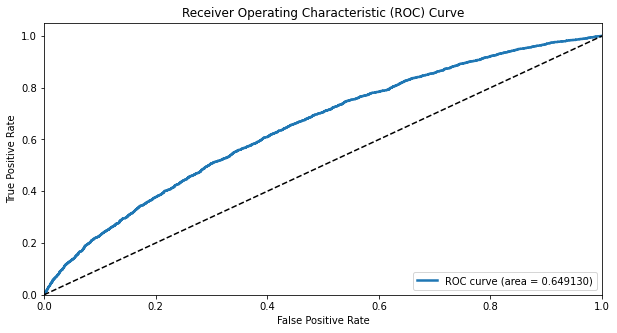

In [10]:
accuracy, precision, recall, f1_score = predict_model.get_performance(y_pred_vcs,y_test,labels=[0,1])
roc_auc = predict_model.plot_roc(voting_classifier_soft,y_test,X_test)

#### 2.4 - Voting Classifier: Save model


In [11]:
utils.save_data_checkpoint(voting_classifier_soft,'../src/models/trained_models/best/vcs.pickle')

Object saved successfully in ../src/models/trained_models/best/vcs.pickle with 47.11MB.


-----------------------------------------------
### 3.0 - Building a Stacked Classifier Ensemble
-----------------------------------------------

In [12]:
X_train = utils.load_data_checkpoint('../data/processed/X_train.pickle')
X_test = utils.load_data_checkpoint('../data/processed/X_test.pickle')
y_train = utils.load_data_checkpoint('../data/processed/y_train.pickle')
y_test = utils.load_data_checkpoint('../data/processed/y_test.pickle')

Object loaded successfully from ../data/processed/X_train.pickle.
Object loaded successfully from ../data/processed/X_test.pickle.
Object loaded successfully from ../data/processed/y_train.pickle.
Object loaded successfully from ../data/processed/y_test.pickle.


In [13]:
base_models = [
    ('rf',RandomForestClassifier(n_jobs=-1, random_state=42,**clf1.best_params_)),
    ('lgbm',lgb.LGBMClassifier(random_state=42,**clf2.best_params_)),
    ('xgb', xgb.XGBClassifier(random_state=42,**clf3.best_params_)),
    ('cbc', CatBoostClassifier(random_state=42,**clf4.best_params_))
]

stacked = StackingClassifier(
    estimators = base_models,
    final_estimator = LogisticRegression(random_state=42),
    cv = 4)


start_time = utils.timer(None)

stacked.fit(X_train, y_train)    

utils.timer(start_time)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
0:	learn: 0.6818707	total: 96.8ms	remaining: 9.58s
1:	learn: 0.6719861	total: 132ms	remaining: 6.49s
2:	learn: 0.6632935	total: 215ms	remaining: 6.96s
3:	learn: 0.6554775	total: 292ms	remaining: 7.01s
4:	learn: 0.6472624	total: 380ms	remaining: 7.21s
5:	learn: 0.6397606	total: 459ms	remaining: 7.2s
6:	learn: 0.6331938	total: 542ms	remaining: 7.2s
7:	learn: 0.6268367	total: 624ms	remaining: 7.18s
8:	learn: 0.6216404	total: 702ms	remaining: 7.1s
9:	learn: 0.6163529	total: 782ms	remaining: 7.03s
10:	learn: 0.6117219	total: 875ms	remaining: 7.08s
11:	learn: 0.6071428	total: 978ms	remaining: 7.17s
12:	learn: 0.6035073	total: 1.1s	remaining: 7.37s
13:	learn: 0.5996944	total: 1.2s	remaining: 7.38s
14:	learn: 0.5962998	total: 1.29s	remaining: 7.31s
15:	learn: 0.5931598	total: 1.38s	remaining: 7.22s
16:	learn: 0.5902120	total: 1.47s	remaining: 7.16s
17:	l

51:	learn: 0.5519452	total: 6.29s	remaining: 5.8s
52:	learn: 0.5516200	total: 6.4s	remaining: 5.68s
53:	learn: 0.5511101	total: 6.55s	remaining: 5.58s
54:	learn: 0.5507773	total: 6.72s	remaining: 5.5s
55:	learn: 0.5503072	total: 6.83s	remaining: 5.37s
56:	learn: 0.5500108	total: 6.97s	remaining: 5.26s
57:	learn: 0.5495829	total: 7.11s	remaining: 5.15s
58:	learn: 0.5492946	total: 7.21s	remaining: 5.01s
59:	learn: 0.5490418	total: 7.35s	remaining: 4.9s
60:	learn: 0.5486346	total: 7.44s	remaining: 4.75s
61:	learn: 0.5483494	total: 7.52s	remaining: 4.61s
62:	learn: 0.5480295	total: 7.6s	remaining: 4.46s
63:	learn: 0.5476926	total: 7.68s	remaining: 4.32s
64:	learn: 0.5474080	total: 7.78s	remaining: 4.19s
65:	learn: 0.5468665	total: 7.88s	remaining: 4.06s
66:	learn: 0.5463899	total: 7.98s	remaining: 3.93s
67:	learn: 0.5461349	total: 8.06s	remaining: 3.79s
68:	learn: 0.5458851	total: 8.14s	remaining: 3.66s
69:	learn: 0.5452757	total: 8.22s	remaining: 3.52s
70:	learn: 0.5450213	total: 8.29s	re

15:	learn: 0.5927792	total: 1.3s	remaining: 6.85s
16:	learn: 0.5898787	total: 1.39s	remaining: 6.81s
17:	learn: 0.5872879	total: 1.48s	remaining: 6.72s
18:	learn: 0.5843253	total: 1.57s	remaining: 6.71s
19:	learn: 0.5821700	total: 1.66s	remaining: 6.63s
20:	learn: 0.5801929	total: 1.73s	remaining: 6.5s
21:	learn: 0.5782011	total: 1.81s	remaining: 6.42s
22:	learn: 0.5762118	total: 1.95s	remaining: 6.51s
23:	learn: 0.5744625	total: 2.15s	remaining: 6.8s
24:	learn: 0.5728746	total: 2.31s	remaining: 6.93s
25:	learn: 0.5711519	total: 2.46s	remaining: 7s
26:	learn: 0.5698778	total: 2.57s	remaining: 6.96s
27:	learn: 0.5687707	total: 2.73s	remaining: 7.01s
28:	learn: 0.5677501	total: 2.83s	remaining: 6.92s
29:	learn: 0.5666344	total: 2.94s	remaining: 6.87s
30:	learn: 0.5654816	total: 3.05s	remaining: 6.79s
31:	learn: 0.5646328	total: 3.18s	remaining: 6.76s
32:	learn: 0.5634889	total: 3.31s	remaining: 6.73s
33:	learn: 0.5626046	total: 3.44s	remaining: 6.67s
34:	learn: 0.5616223	total: 3.57s	rem

78:	learn: 0.5438001	total: 6.65s	remaining: 1.77s
79:	learn: 0.5432296	total: 6.72s	remaining: 1.68s
80:	learn: 0.5429209	total: 6.8s	remaining: 1.59s
81:	learn: 0.5427930	total: 6.88s	remaining: 1.51s
82:	learn: 0.5425831	total: 6.96s	remaining: 1.43s
83:	learn: 0.5424263	total: 7.04s	remaining: 1.34s
84:	learn: 0.5422963	total: 7.12s	remaining: 1.25s
85:	learn: 0.5421110	total: 7.19s	remaining: 1.17s
86:	learn: 0.5417179	total: 7.26s	remaining: 1.08s
87:	learn: 0.5413882	total: 7.34s	remaining: 1s
88:	learn: 0.5411919	total: 7.42s	remaining: 917ms
89:	learn: 0.5409330	total: 7.49s	remaining: 832ms
90:	learn: 0.5406971	total: 7.56s	remaining: 748ms
91:	learn: 0.5403273	total: 7.64s	remaining: 664ms
92:	learn: 0.5400209	total: 7.72s	remaining: 581ms
93:	learn: 0.5398486	total: 7.81s	remaining: 498ms
94:	learn: 0.5396308	total: 7.9s	remaining: 416ms
95:	learn: 0.5393602	total: 7.98s	remaining: 332ms
96:	learn: 0.5389045	total: 8.06s	remaining: 249ms
97:	learn: 0.5387013	total: 8.14s	re

#### 3.2 -  Stacked Classifier: Inference time

In [14]:
start_time = utils.timer(None)

y_pred = stacked.predict(X_test.iloc[0].values.reshape(1,-1))

utils.timer(start_time)

/home/app/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Time taken by function: 0 hours , 0 mins and 0.399165 secs


In [15]:
start_time = utils.timer(None)

y_pred = stacked.predict(X_test)

utils.timer(start_time)

Time taken by function: 0 hours , 0 mins and 2.762999 secs


#### 3.3 - Stacked Classifier: Performance metrics and classification report

Model Performance metrics:
------------------------------
Accuracy: 0.7408
Precision: 0.5689655172413793
Recall: 0.02530674846625767
F1 Score: 0.04845814977973568

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7392
           1       0.57      0.03      0.05      2608

    accuracy                           0.74     10000
   macro avg       0.66      0.51      0.45     10000
weighted avg       0.70      0.74      0.64     10000


Prediction Confusion Matrix:
------------------------------
      0   1
0  7342  50
1  2542  66


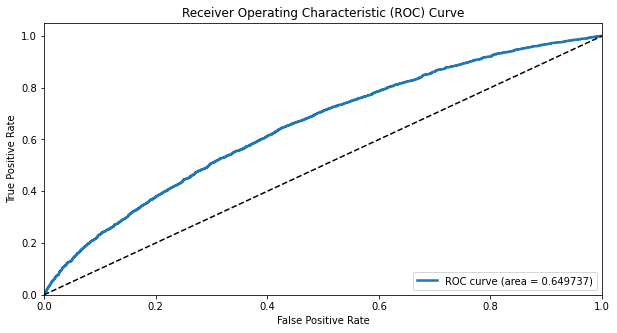

In [16]:
accuracy, precision, recall, f1_score = predict_model.get_performance(y_pred,y_test,labels=[0,1])
roc_auc = predict_model.plot_roc(stacked,y_test,X_test)

#### 3.4 - Stacked Classifier: Save model


In [17]:
utils.save_data_checkpoint(stacked,'../src/models/trained_models/best/stkd.pickle')

Object saved successfully in ../src/models/trained_models/best/stkd.pickle with 47.11MB.
